In [ ]:
import ingestion
import people_library
import retrieval
import os
import pickle
import matplotlib.pyplot as plt
import math

c:\Users\pratc\anaconda3\envs\envGlimpse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
plist = ingestion.__main__()

In [ ]:
# Name  and write faces here
people = people_library.PeopleLibrary()
people.rename_face(plist[1]['label'], 'Aditya')
people.rename_face(plist[6]['label'], 'Pratik')
people.rename_face(plist[10]['label'], 'Dhruv')
people.rename_face(plist[11]['label'], 'Sayali')
people.rename_face(plist[12]['label'], 'Aishwarya')

# adding names to faces
people.write_out()


taking union...
[23 24 22 21 25 95 91 33 34 93]


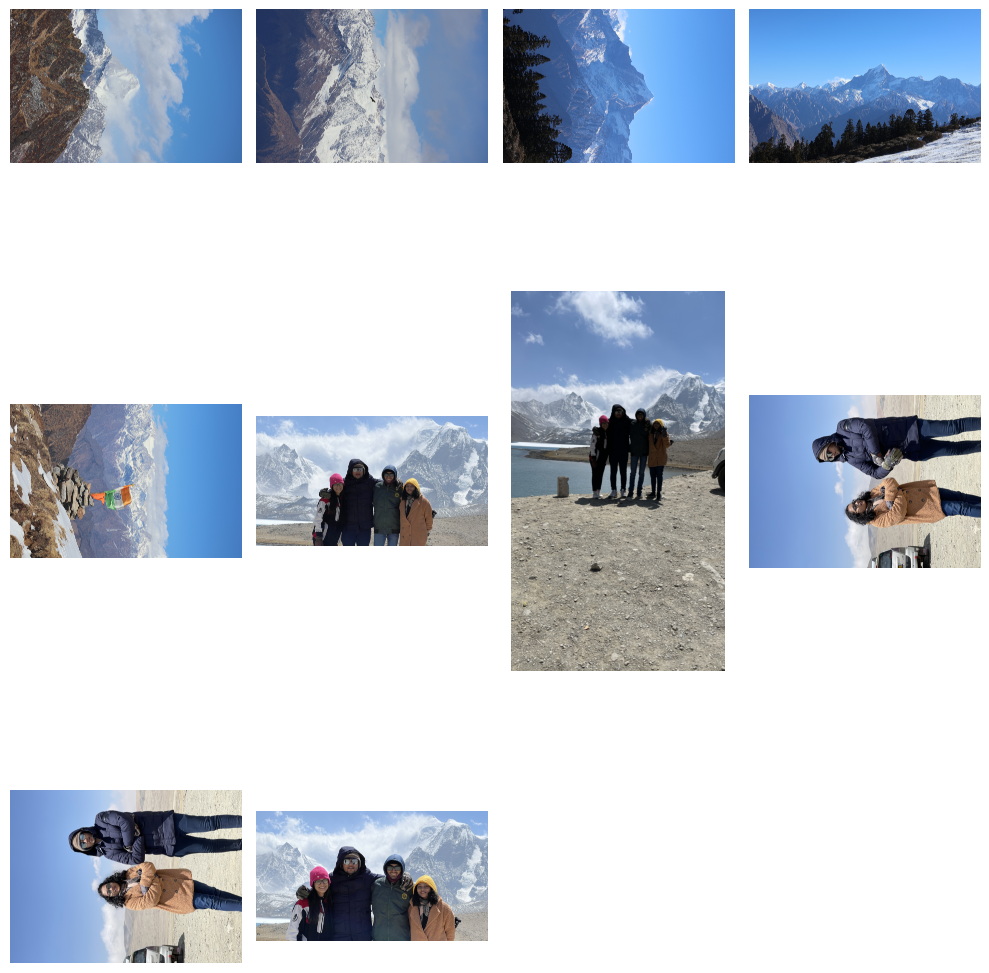

In [ ]:
# Retrieval and plot

img_indices = retrieval.__main__(query="snowy mountains")
print(img_indices)

embed_dir = 'embed_store'
img_path_index = pickle.load(open(os.path.join(embed_dir, 'img_path_index.pkl'), 'rb'))

filtered_images = [img_path_index[idx] for idx in img_indices]


# display
num_images = len(filtered_images)
rows = math.ceil(num_images / 4)

fig, axes = plt.subplots(rows, 4, figsize=(10, 4 * rows))
if rows == 1:
    axes = [axes] # Handle the case where there's only one row

for i, img_path in enumerate(filtered_images):
    row = i // 4
    col = i % 4
    img = plt.imread(img_path)
    axes[row][col].imshow(img)
    axes[row][col].axis('off')

# Hide any unused subplots in the last row
if num_images % 4 != 0:
    num_empty = 4 - (num_images % 4)
    for i in range(num_empty):
        fig.delaxes(axes[-1][-1 - i])

plt.tight_layout()
plt.show()